Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
from __future__ import print_function					            # for printing I guess
import imageio											                      # for image input output
import matplotlib.pyplot as plt 						              # plotting
import numpy as np 									                      # matmul
import os											                            # file handling
import sys												                        # system management
import tarfile 										   	                    # zipfile unzip
from IPython.display import display, Image 				        # image display in ipython.
from sklearn.linear_model import LogisticRegression 	    # main model
from sklearn import tree
from six.moves.urllib.request import urlretrieve		      # url rewuest to download the dataset I guess
from six.moves import cPickle as pickle 			           	# pickle to read dat files
import random 										                        # because numpy.random is giving same result always
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier          # Classifier Cool

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified .\notMNIST_large.tar.gz
Found and verified .\notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

.\notMNIST_large already present - Skipping extraction of .\notMNIST_large.tar.gz.
['.\\notMNIST_large\\A', '.\\notMNIST_large\\B', '.\\notMNIST_large\\C', '.\\notMNIST_large\\D', '.\\notMNIST_large\\E', '.\\notMNIST_large\\F', '.\\notMNIST_large\\G', '.\\notMNIST_large\\H', '.\\notMNIST_large\\I', '.\\notMNIST_large\\J']
.\notMNIST_small already present - Skipping extraction of .\notMNIST_small.tar.gz.
['.\\notMNIST_small\\A', '.\\notMNIST_small\\B', '.\\notMNIST_small\\C', '.\\notMNIST_small\\D', '.\\notMNIST_small\\E', '.\\notMNIST_small\\F', '.\\notMNIST_small\\G', '.\\notMNIST_small\\H', '.\\notMNIST_small\\I', '.\\notMNIST_small\\J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [4]:
from IPython.display import display, Image
a = os.listdir("notMNIST_small/A") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/A/"+a[rand]))
a = os.listdir("notMNIST_small/B") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/B/"+a[rand]))
a = os.listdir("notMNIST_small/C") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/C/"+a[rand]))
a = os.listdir("notMNIST_small/D") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/D/"+a[rand]))
a = os.listdir("notMNIST_small/E") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/E/"+a[rand]))
a = os.listdir("notMNIST_small/F") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/F/"+a[rand]))
a = os.listdir("notMNIST_small/G") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/G/"+a[rand]))
a = os.listdir("notMNIST_small/H") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/H/"+a[rand]))
a = os.listdir("notMNIST_small/I") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/I/"+a[rand]))
a = os.listdir("notMNIST_small/J") 															#To display first ten images.
rand = random.randint(0,1000)
display(Image(filename = "notMNIST_small/J/"+a[rand]))


Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [5]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (imageio.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except (IOError, ValueError) as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

.\notMNIST_large\A.pickle already present - Skipping pickling.
.\notMNIST_large\B.pickle already present - Skipping pickling.
.\notMNIST_large\C.pickle already present - Skipping pickling.
.\notMNIST_large\D.pickle already present - Skipping pickling.
.\notMNIST_large\E.pickle already present - Skipping pickling.
.\notMNIST_large\F.pickle already present - Skipping pickling.
.\notMNIST_large\G.pickle already present - Skipping pickling.
.\notMNIST_large\H.pickle already present - Skipping pickling.
.\notMNIST_large\I.pickle already present - Skipping pickling.
.\notMNIST_large\J.pickle already present - Skipping pickling.
.\notMNIST_small\A.pickle already present - Skipping pickling.
.\notMNIST_small\B.pickle already present - Skipping pickling.
.\notMNIST_small\C.pickle already present - Skipping pickling.
.\notMNIST_small\D.pickle already present - Skipping pickling.
.\notMNIST_small\E.pickle already present - Skipping pickling.
.\notMNIST_small\F.pickle already present - Skipping pi

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

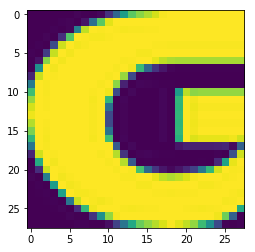

In [6]:

pickle_file = train_datasets[random.randint(0,9)]  					    #index 0 refers to A, similiarly 1 is B,2 is C...
with open(pickle_file,'rb') as f:
	letter_set = pickle.load(f)    						# unpickle. (Easy stuff from .dat)
	sample_idx = np.random.randint(len(letter_set)) 	# randomly pick a image
	sample_image = letter_set[sample_idx,:,:]			# extracting a single image or rather a 2D slice from this set.
	plt.figure()
	plt.imshow(sample_image) 						    # Display in matplotlib
	plt.show()



---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [7]:

for i in range(10):
	pickle_file1 = train_datasets[i]  					    #index 0 refers to A, similiarly 1 is B,2 is C...
	pickle_file2 = test_datasets[i]
	with open(pickle_file1,'rb') as f:
		letter_set = pickle.load(f)
		print("The no of training examples of class ",i+1," is ",len(letter_set))
	with open(pickle_file2,'rb') as f:
		letter_set = pickle.load(f)
		print("The no of testing examples of class ",i+1," is ",len(letter_set))	

#kind of getting around 52900 training and 1872 testing examples per class. Confirmed it's all balanced.


The no of training examples of class  1  is  52909
The no of testing examples of class  1  is  1872
The no of training examples of class  2  is  52911
The no of testing examples of class  2  is  1873
The no of training examples of class  3  is  52912
The no of testing examples of class  3  is  1873
The no of training examples of class  4  is  52911
The no of testing examples of class  4  is  1873
The no of training examples of class  5  is  52912
The no of testing examples of class  5  is  1873
The no of training examples of class  6  is  52912
The no of testing examples of class  6  is  1872
The no of training examples of class  7  is  52912
The no of testing examples of class  7  is  1872
The no of training examples of class  8  is  52912
The no of testing examples of class  8  is  1872
The no of training examples of class  9  is  52912
The no of testing examples of class  9  is  1872
The no of training examples of class  10  is  52911
The no of testing examples of class  10  is  187

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [8]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [9]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

print("After Shuffling!")
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

After Shuffling!
Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

64006 3


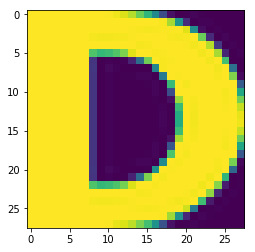

In [10]:
#Firstly Checking data by opening some random files in the training dataset


data_file = train_dataset 
randomnum = random.randint(0,train_labels.shape[0])
image_train = data_file[randomnum]	  
print(randomnum,train_labels[randomnum])  
plt.imshow(image_train)
plt.show()


5200 7


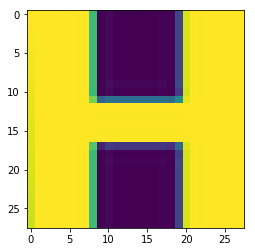

In [11]:
#Secondly Checking data by opening some random files in the Validation dataset


data_file = valid_dataset 
randomnum = random.randint(0,valid_labels.shape[0])
image_train = data_file[randomnum]	  
print(randomnum,valid_labels[randomnum])  
plt.imshow(image_train)
plt.show()

9914 7


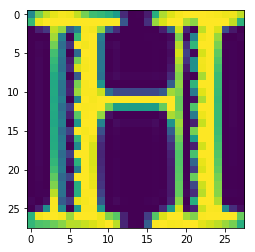

In [12]:
#Thirdly Checking data by opening some random files in the testing dataset


data_file = test_dataset 
randomnum = random.randint(0,test_labels.shape[0])
image_train = data_file[randomnum]	  
print(randomnum,test_labels[randomnum])  
plt.imshow(image_train)
plt.show()


Finally, let's save the data for later reuse:

In [13]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [14]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [15]:

with open('notMNIST.pickle','rb') as f:
  setofstuff = pickle.load(f)
  data = setofstuff['train_dataset']

with open('notMNIST.pickle','rb') as f:
  setofstuff = pickle.load(f)
  label = setofstuff['train_labels']

with open('notMNIST.pickle','rb') as f:
  setofstuff = pickle.load(f)
  valid = setofstuff['valid_dataset']

with open('notMNIST.pickle','rb') as f:
  setofstuff = pickle.load(f)
  validl = setofstuff['valid_labels']
print("Starting to train model")  
data = data.reshape(data.shape[0],-1)
valid = valid.reshape(valid.shape[0],-1)
clf = MLPClassifier(alpha=0.1)
clf.fit(data,label)
prediction = clf.predict(valid)
accscore = accuracy_score(validl,prediction)
print("Final accuracy score is ",accscore)





Starting to train model
Final accuracy score is  0.8886
